In [1]:
import torch
import matplotlib.pyplot as plt
from time import time

In [2]:
from gromov_wasserstein import Entropic_GromovWasserstein as Entropic_GW

In [3]:
def show_P(P):
    fig, ax = plt.subplots(1, 2)

    ax[0].imshow(P)
    ax[0].set_title('P')

    max_P, idx = torch.max(P, dim=1, keepdim=True)
    X = (P>=max_P).int() #* 10

    ax[1].imshow(X)
    ax[1].set_title('argmax rows of P')

In [52]:
# randomly create point clouds x, y
# y is just a translated cloud from x

x = torch.randn((50, 2)) * 10
y = x.clone() + 100

x = torch.tensor([[0, 0], [0, 2], [1, 0], [1, 1]]).float()
y = x.clone() + 5

n = 20
x = torch.tensor([[i, 0*i + 1] for i in range(n)]).float()
y = x.clone() + n

#noise = torch.randn(y.shape) * 2

px = torch.ones(x.shape[0])
px /= px.sum()

py = torch.ones(y.shape[0])
py /= py.sum()

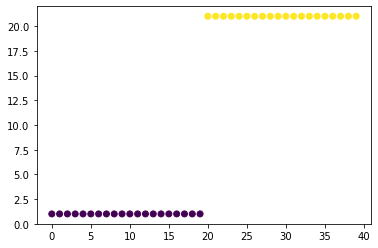

In [53]:
# visualize the points in 2D

points = torch.cat((x,y), dim=0)
colors = torch.cat((torch.zeros(x.shape[0]), torch.ones(y.shape[0])), dim=0)

plt.scatter(points[:,0], points[:, 1], c=colors)

It: 0 | Err = 0.133754
Break in Sinkhorn alg at 1-th iteration: Err = 0.000000
Break in Sinkhorn alg at 1-th iteration: Err = 0.000000
Break in Gromov-Wasserstein at 7-th iteration: Err = 0.000000
Computed in 0.7732 s
gw_cost: 0.00581


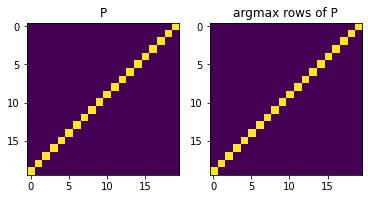

In [77]:
gw_dist = Entropic_GW(eps=1e0, max_iter=100, thresh=1e-5, 
                      w_max_iter=500, w_thresh=1e-9,
                      inter_loss_type='square_loss', 
                      stable_sinkhorn=True, verbose=True)

t0 = time()
gw_cost, P = gw_dist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('gw_cost: %.5f' %(gw_cost))

show_P(P)

It: 0 | Err = 0.100426
It: 10 | Err = 0.004610
It: 20 | Err = 0.000058
Break in Gromov-Wasserstein at 25-th iteration: Err = 0.000007
Computed in 0.0192 s
gw_cost: 699.16504


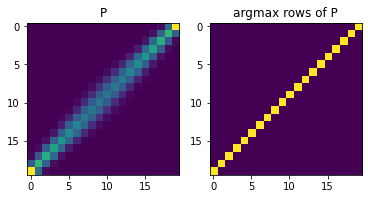

In [63]:
gw_dist = Entropic_GW(eps=1e3, max_iter=100, thresh=1e-5, 
                      w_max_iter=1, w_thresh=1e-9,
                      inter_loss_type='square_loss', 
                      stable_sinkhorn=False, verbose=True)

t0 = time()
gw_cost, P = gw_dist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('gw_cost: %.5f' %(gw_cost))

show_P(P)

In [78]:
# randomly create point clouds x, y
# y is just a translated cloud from x

x = torch.randn((50, 2)) * 10
y = x.clone() + 100

#noise = torch.randn(y.shape) * 2

px = torch.ones(x.shape[0])
px /= px.sum()

py = torch.ones(y.shape[0])
py /= py.sum()

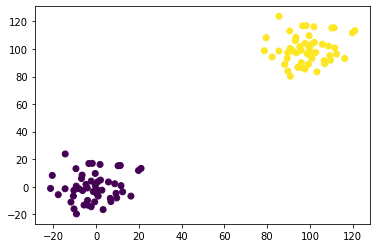

In [79]:
# visualize the points in 2D

points = torch.cat((x,y), dim=0)
colors = torch.cat((torch.zeros(x.shape[0]), torch.ones(y.shape[0])), dim=0)

plt.scatter(points[:,0], points[:, 1], c=colors)

It: 0 | Err = 0.127753
It: 10 | Err = 0.019740
Break in Gromov-Wasserstein at 14-th iteration: Err = 0.000000
Computed in 5.3545 s
gw_cost: 28991.55469


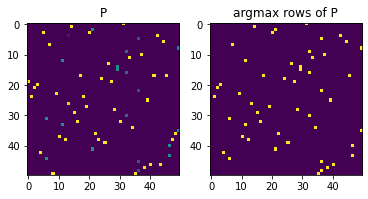

In [86]:
gw_dist = Entropic_GW(eps=1e-1, max_iter=100, thresh=1e-9, 
                      w_max_iter=1000, w_thresh=1e-9,
                      inter_loss_type='square_loss', 
                      stable_sinkhorn=True, verbose=True)

t0 = time()
gw_cost, P = gw_dist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('gw_cost: %.5f' %(gw_cost))

show_P(P)